---
title: "Data Analysis"
subtitle: "Comprehensive Data Cleaning & Exploratory Analysis of Workforce Disparities"
author:
  - name: "Team 8"
  - name: Jianhao Hong
    affiliations:
      - id: bu
        name: Boston University
        city: Boston
        state: MA
  - name: Xinran Li
    affiliations:
      - ref: bu
  - name: Chialing Sung
    affiliations:
      - ref: bu
  - name: Zimo Zeng
    affiliations:
      - ref: bu
bibliography: reference/references.bib
csl: reference/csl/econometrica.csl
format: 
  html:
    toc: true
    number-sections: true
    df-print: paged
    code-fold: true
---

## ✒️ **Introduction**
  
In this study, we conduct an in-depth analysis of workforce disparities, focusing on gender, wages, and labor market trends. Our analysis is based on real-world job postings data from **[Lightcast Job Postings](https://drive.google.com/file/d/1VNBTxArDMN2o9fJBDImaON6YUAyJGOU6/view)**[@lightcast2024]. To ensure a clean and reliable dataset, we first perform extensive data preprocessing, removing redundant classification codes and tracking columns. We then handle missing values and visualize their distribution using a heatmap, ensuring our dataset maintains integrity and completeness. Lastly, through various exploratory visualizations, we extract meaningful insights about industry job demand, salary distributions, and remote work trends. Our goal is to highlight key patterns that inform labor market dynamics and workforce disparities.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('~/ad688-employability-sp25A1-group8/job_postings.csv')

### 📌 **Which Columns Should Be Dropped, and Why?**
In our job market analysis, certain columns in the dataset do not provide meaningful insights and should be removed. These columns may contain tracking data, duplicate information, or outdated classification codes. By removing them, we ensure our analysis is focused, relevant, and efficient.

In [3]:
columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_5"
]
df.drop(columns=columns_to_drop, inplace=True)

### 🚫 **Irrelevant or Redundant Columns**
  
**Unique Identifiers & Tracking Data**
- `ID`: A unique identifier that does not add value to job market trends analysis.
- `URL`, `ACTIVE_URLS`: Job posting URLs that do not contribute to labor market insights.
- `DUPLICATES`: A tracking column that flags duplicate records. Instead, we will remove duplicates programmatically.
- `LAST_UPDATED_TIMESTAMP`: Tracks data updates but does not impact our analysis.
  
**Redundant NAICS (Industry) and SOC (Occupation) Codes**
- `NAICS2`, `NAICS3`, `NAICS4`, `NAICS5`, `NAICS6`: Represent different levels of industry classification. We retain only `NAICS_2022_6` to avoid redundancy.
- `SOC_2`, `SOC_3`, `SOC_5`: Represent different levels of job classification. We retain `SOC_2021_4` for consistency.

### 🔍 **Why Remove Multiple Versions of NAICS/SOC Codes?**
  
✅ **Ensures Data Consistency**
- Using multiple versions of NAICS/SOC codes could result in classification mismatches.
- Retaining only the latest versions ensures alignment with the most recent industry and occupation standards.
  
✅ **Reduces Redundancy**
- Storing multiple levels of classification increases data complexity without adding value.
- Keeping only `NAICS_2022_6` and `SOC_2021_4` simplifies the dataset.
  
✅ **Improves Analytical Accuracy**
- Prevents double counting due to overlapping classification levels.
- Streamlines job market segmentation, making it easier to draw insights.

### 📊 **How Will This Improve Analysis?**
  
🔹 **Increases Processing Efficiency**
- **Optimized Memory Usage**: A smaller dataset reduces memory consumption, making data operations faster and more efficient.
- **Faster Data Processing**: Removing unnecessary columns reduces computational overhead, enabling quicker transformations, queries, and aggregations.
- **Accelerated Data Visualization**: A streamlined dataset ensures that visualizations load and render quickly.
  
🔹 **Enhances Data Consistency**
- **Eliminates Conflicting Information**: Multiple versions of industry and occupation classification codes (e.g., NAICS and SOC) can create inconsistencies in analysis.
- **Aligns with Current Standards**: Retaining only `NAICS_2022_6` and `SOC_2021_4` ensures relevance and accuracy.
- **Facilitates Comparability**: Standardized codes enable accurate cross-sector and job role comparisons.
  
🔹 **Improves Visualization Clarity**
- **Reduces Clutter in Charts and Graphs**: Too many redundant columns can overload visualizations, making them harder to interpret.
- **Simplifies Data Interpretation**: By keeping only essential classification codes, we highlight key trends without unnecessary complexity.
- **Facilitates Trend Analysis**: A well-structured dataset allows for clear insights into industry demand, salary distribution, and workforce trends.

## 🔍 **Handling Missing Values**
  
Ensuring data integrity and accuracy is crucial for reliable analysis. We employ the following strategies to handle missing values:
  
### Identifying Missing Values
- We count missing values in each column and use visualization tools to examine their distribution.
- This helps determine which fields have high proportions of missing values and their impact on the dataset.
  
### Strategies for Handling Missing Values
- **Numerical Fields (e.g., Salary, Years of Experience)**: Filled using the median to reduce the impact of extreme values.
- **Categorical Fields (e.g., Industry, Job Category)**: Filled with "Unknown" to prevent information loss.
- **Columns with >40% Missing Data**: Removed to avoid introducing bias that could affect analytical accuracy.
  
### Post-Processing Check
- After handling missing values, we re-examine the dataset to ensure completeness and evaluate the impact of our methods.


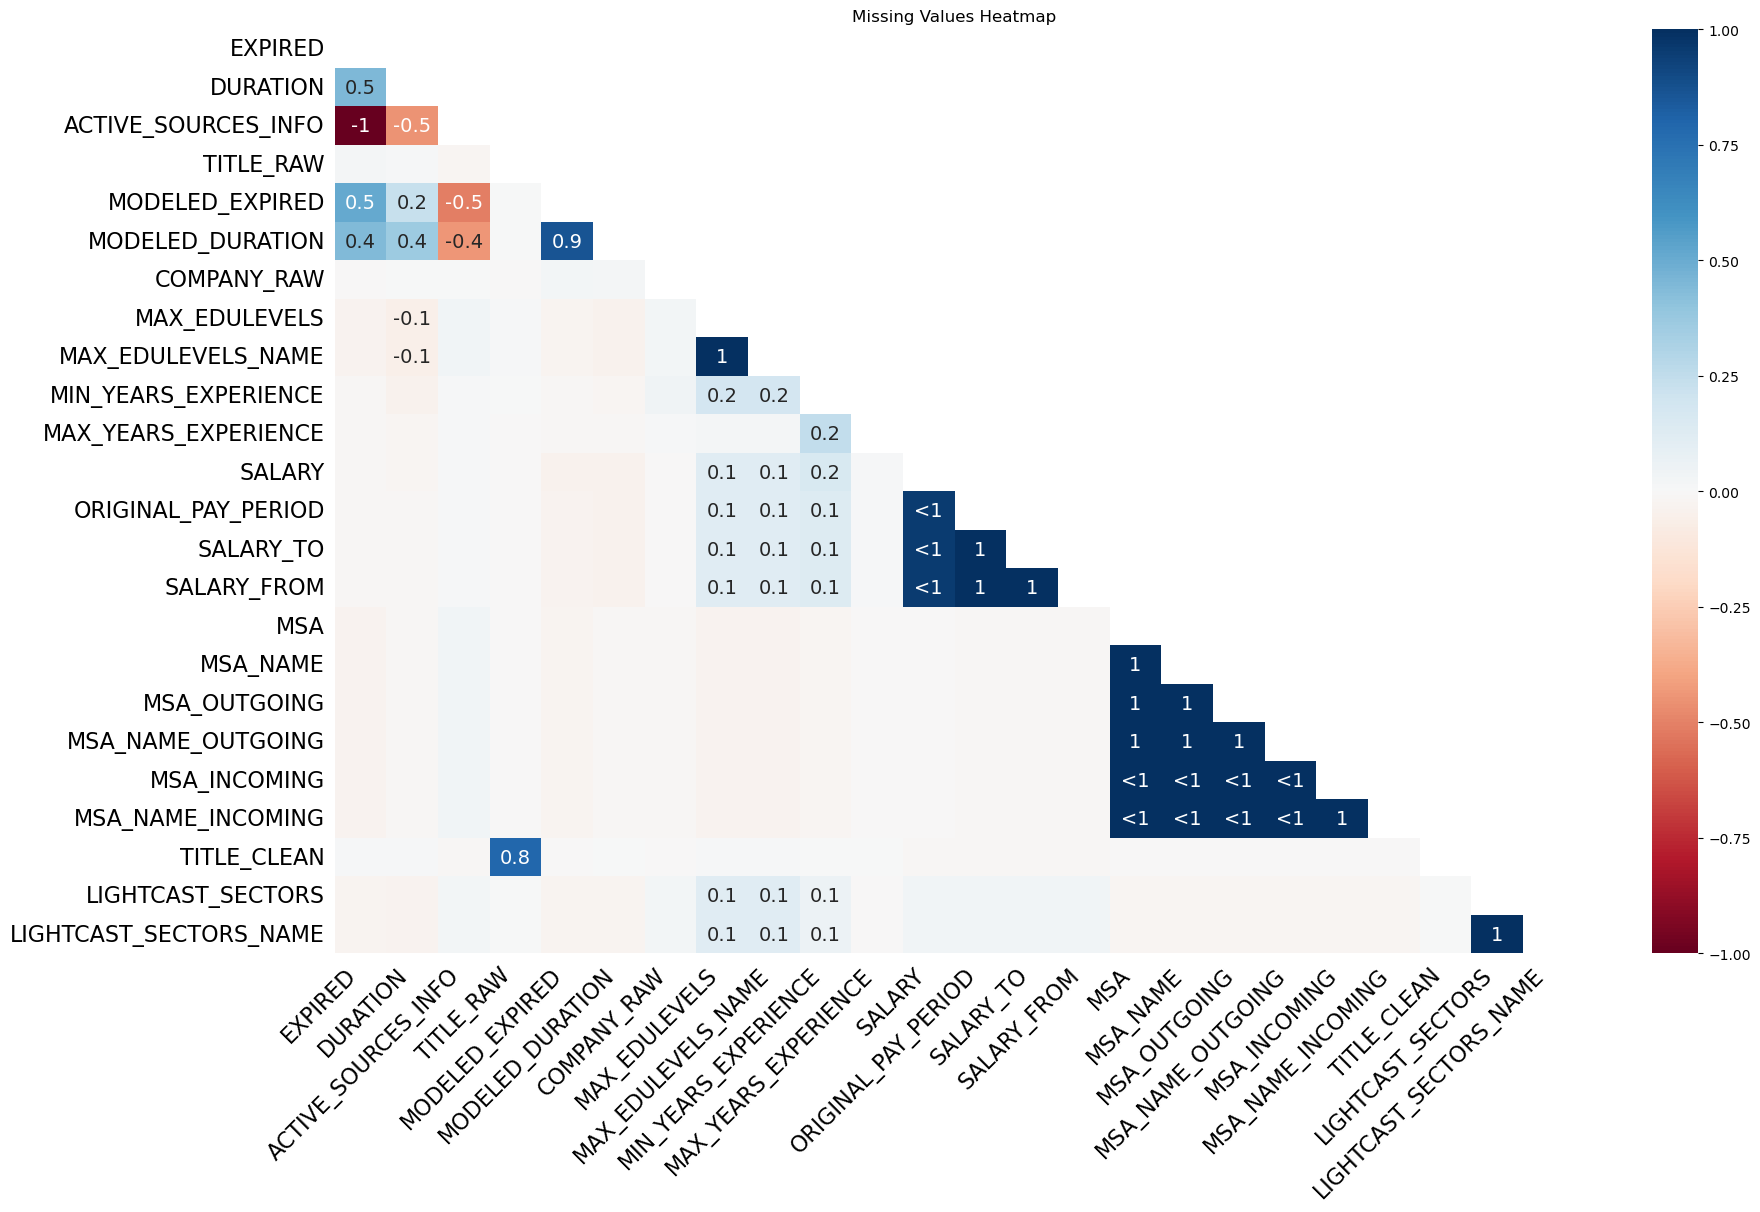

In [4]:
# Visualize missing data
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.savefig("_output/data_analysis_1_missing_values_heatmap.png")
plt.show()

# Drop columns with >40% missing values
df.dropna(thresh=len(df) * 0.4, axis=1, inplace=True)

In [5]:
# Fill missing values
df.loc[:, "SALARY"] = df["SALARY"].fillna(df["SALARY"].median())
df.loc[:, "NAICS_2022_6_NAME"] = df["NAICS_2022_6_NAME"].fillna("Unknown")
df.loc[:, "REMOTE_TYPE_NAME"] = df["REMOTE_TYPE_NAME"].fillna("Unknown")

## 📈 **Visualizations and Key Insights**

Exploratory Data Analysis (EDA) is a crucial step in understanding labor market trends and workforce dynamics. By leveraging diverse visualizations, we can uncover industry patterns, salary distributions, and shifts in employment structures. This section aims to provide a clear and concise interpretation of the job market, helping stakeholders make informed decisions based on data-driven insights.
  

### 📊 **Industry Job Demand Analysis (Bar Chart)**
#### **Reason**  
The bar chart compares different categories of data to visually show the difference in the number of jobs by industry. With this visualization, we can quickly identify which industries have the greatest hiring demand and help job seekers make informed career choices.  

#### **Analysis**  
The bar chart highlights job demand across industries, revealing that technology (IT services, programming), finance (banking, accounting), and healthcare (medical practitioners, mental health specialists) have the highest job postings. These sectors are expanding due to technological advancements, digital transformation, and increasing healthcare needs.  

Conversely, manufacturing, retail, and administrative support show lower demand, likely impacted by automation and shifting consumer trends. Notably, AI-related roles are on the rise, indicating that AI is creating new opportunities rather than replacing jobs, particularly in data science, AI research, and software development.  

Technology, finance, and healthcare offer strong career prospects, ensuring stability and competitive salaries. Job seekers in declining industries should adapt by learning automation, AI, and data analysis. The bar chart clearly visualizes these industry trends, guiding job seekers toward high-demand fields and future-proof career choices. 

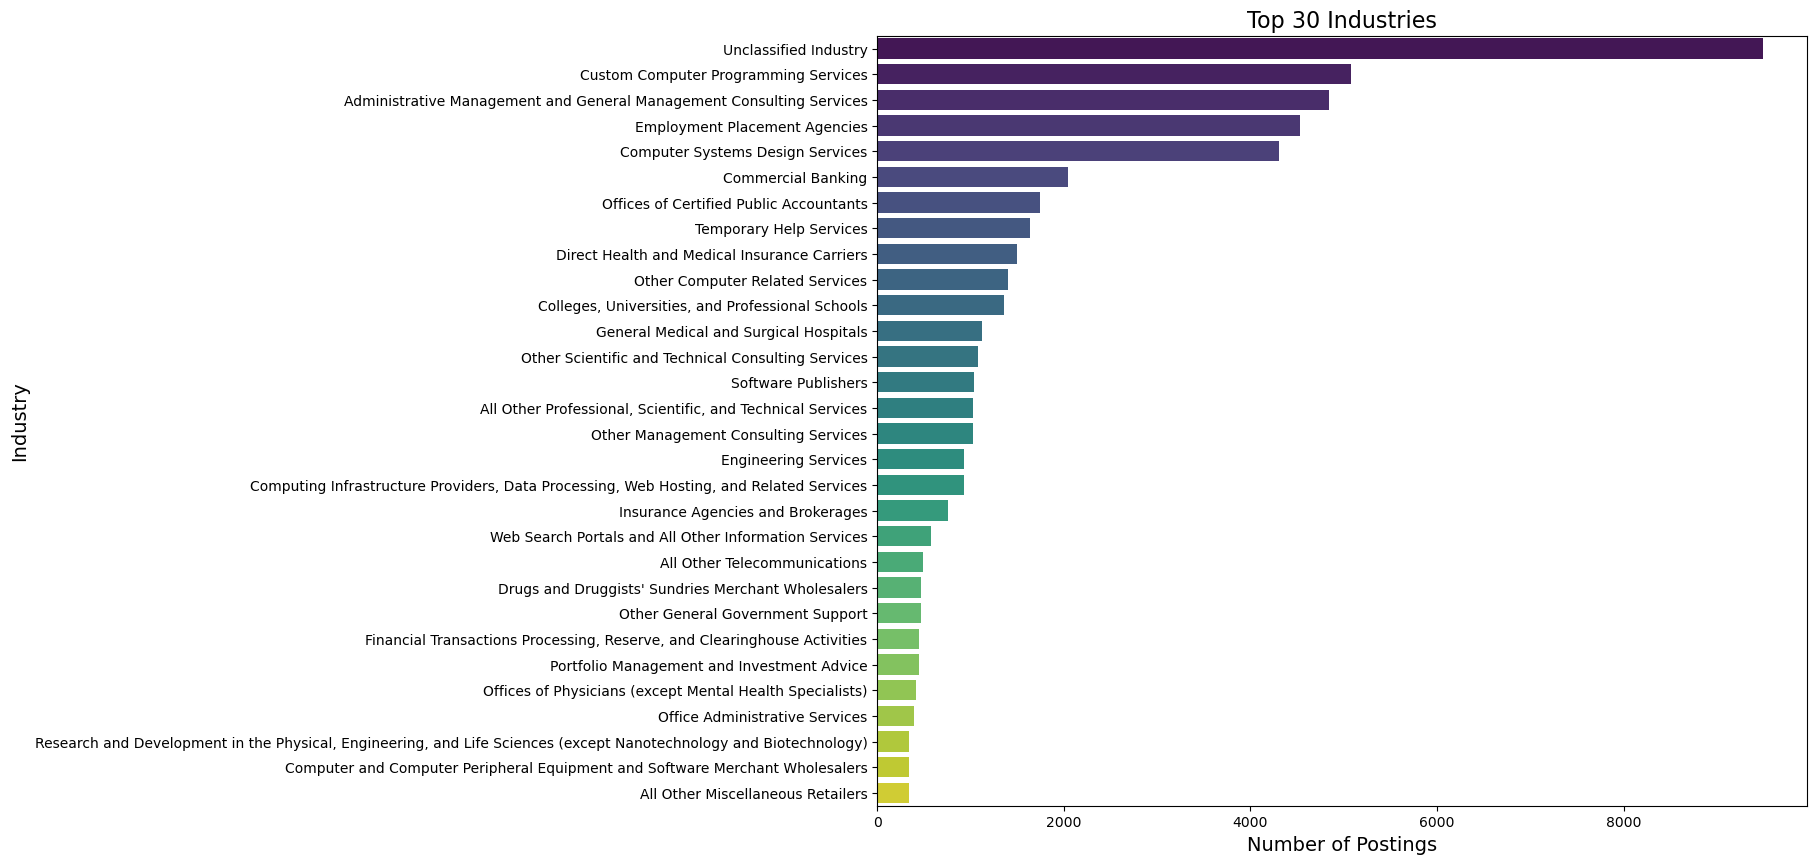

In [6]:
# Compute the top 30 industries by job postings
counts = df["NAICS_2022_6_NAME"].value_counts()
top_30 = counts.head(30)

# Set figure size
plt.figure(figsize=(12, 10))

# Create a horizontal bar plot with correct `hue` usage
sns.barplot(x=top_30.values, y=top_30.index, hue=top_30.index, palette="viridis", legend=False)

# Set titles and labels
plt.title("Top 30 Industries", fontsize=16)
plt.xlabel("Number of Postings", fontsize=14)
plt.ylabel("Industry", fontsize=14)

# Show the plot
plt.savefig("_output/data_analysis_2_top_30_industries.png")
plt.show()



### 📉 **Industry Salary Distribution Analysis (Box Plot)**
#### **Reason**  
The box plot clearly shows the median, range, and outliers of salaries to help analyze salary differences between industries. It not only reveals which industries pay the most, but also shows how salaries fluctuate, giving job seekers an idea of the industry's earning potential and room for growth.  

#### **Analysis**  
The box plot effectively visualizes salary distribution across industries, highlighting median salaries, variations, and outliers to identify high-paying sectors.  

Our analysis shows that finance and technology (software engineering, data science, AI research) offer the highest salaries, with a wide distribution range, indicating strong earning potential. These fields allow professionals to increase earnings through experience and specialized skills.  

In contrast, retail, education, and administrative roles have lower salaries with limited variation, suggesting restricted upward mobility. AI-related jobs exhibit high salary fluctuations, reflecting strong demand and competitive compensation for AI talent.  

The box plot is ideal for analyzing salary trends, as it clearly compares industries, showing which sectors provide the best financial growth opportunities. This information helps job seekers align their career choices with high-paying industries, maximizing their earning potential in the evolving job market.  

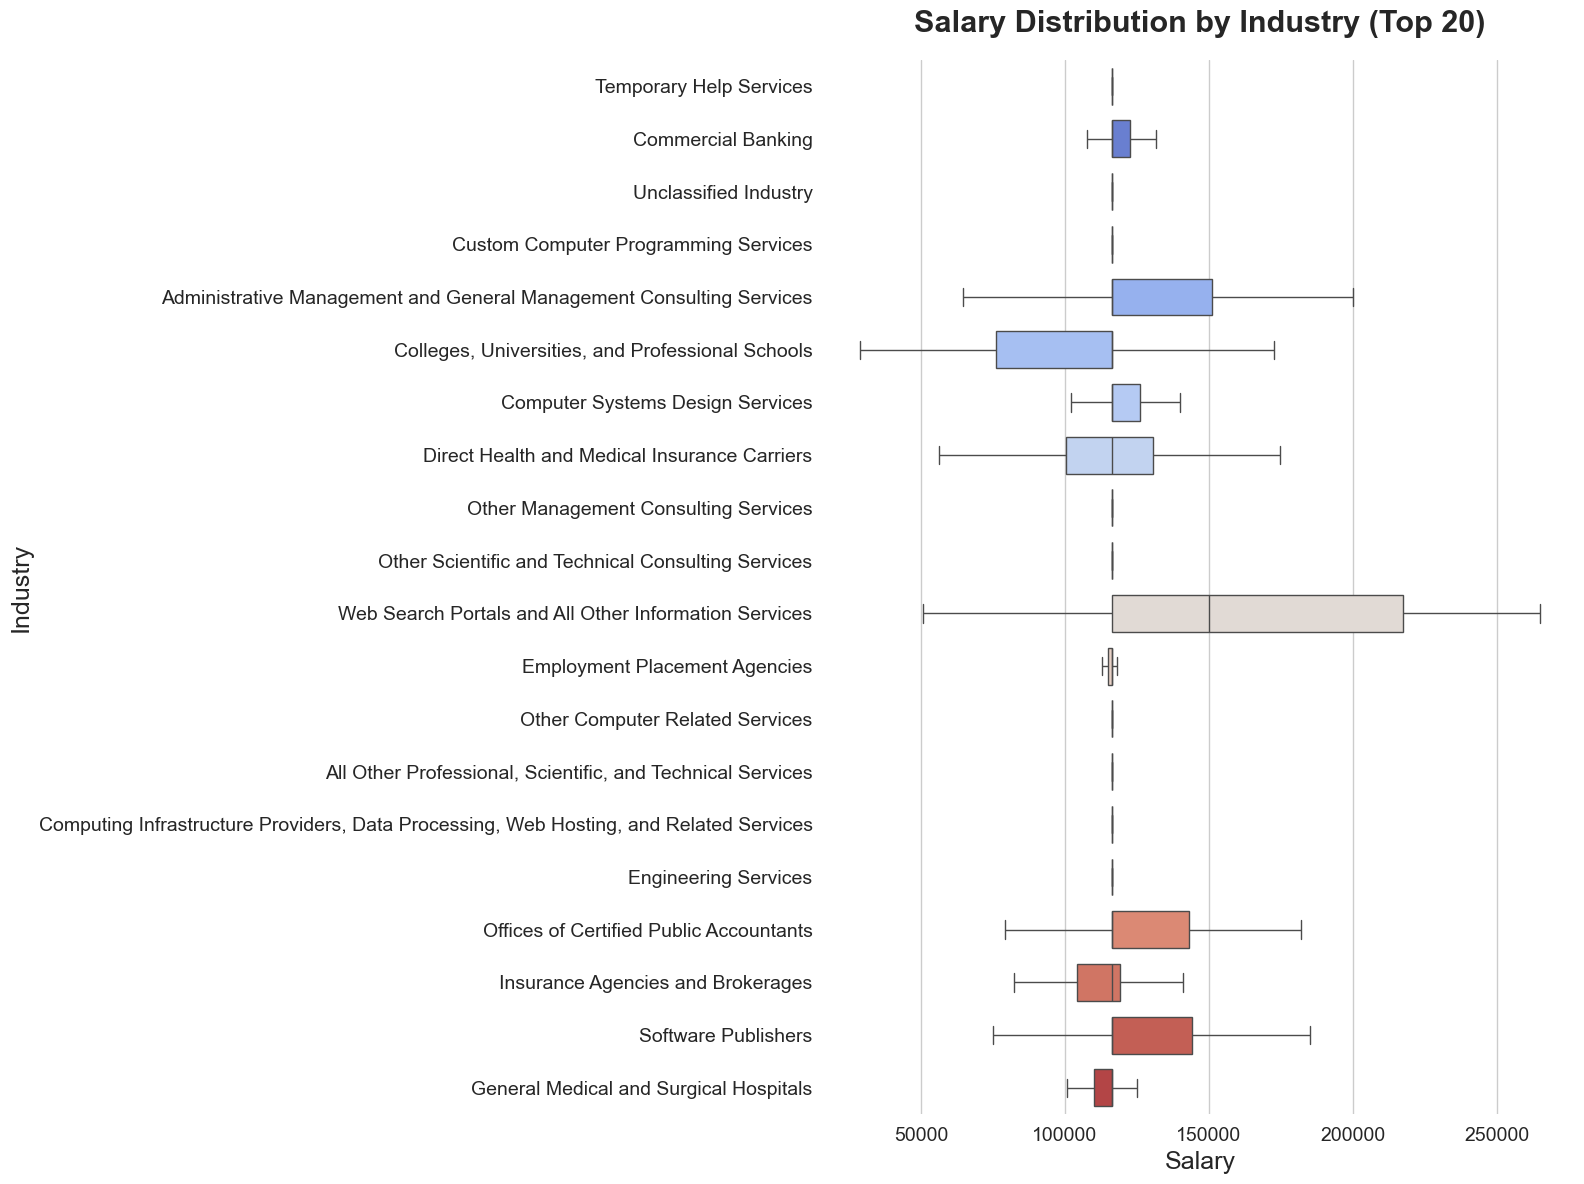

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 20 industries instead of 30 for better readability
top_n = 20
top_industries = counts.head(top_n).index
df_top = df[df["NAICS_2022_6_NAME"].isin(top_industries)]

# Set Seaborn theme for a cleaner look
sns.set_theme(style="whitegrid")

# Set a larger figure size
fig, ax = plt.subplots(figsize=(16, 12))

# Create a horizontal boxplot for better readability
sns.boxplot(
    data=df_top,
    y="NAICS_2022_6_NAME",
    x="SALARY",
    hue="NAICS_2022_6_NAME",
    palette="coolwarm",
    showfliers=False,
    width=0.7,
    legend=False,
    ax=ax
)

# Set titles and labels with improved styling
ax.set_title("Salary Distribution by Industry (Top 20)", fontsize=22, fontweight="bold", pad=20)
ax.set_xlabel("Salary", fontsize=18)
ax.set_ylabel("Industry", fontsize=18)

# Increase tick label font size for better readability
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

# Remove unnecessary spines for a minimalist look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.savefig("_output/data_analysis_3_salary_boxplot_by_industry.png")
plt.show()

### ⭕️ **Remote vs. On-Site Work Analysis (Pie Chart)**
#### **Reason**  
Pie charts are useful for showing the proportion of different categories and visually comparing the proportion of remote, mixed, and on-site work. It helps job seekers quickly understand remote work trends and identify which industries are more likely to offer remote jobs.  

#### **Analysis**  
The pie chart illustrates the distribution of **Remote**, **Hybrid Remote**, and **On-Site** jobs, highlighting the growing trend of flexible work arrangements.  

- **78.6%** of jobs are fully remote, especially in technology (software development, data science) and marketing, where digital collaboration is seamless.  
- **14.2%** of jobs are hybrid remote, reflecting a shift toward partial flexibility.  
- Only **7.13%** of jobs are entirely on-site, primarily in healthcare, manufacturing, and retail, where physical presence is essential.  

The dominance of remote work suggests companies are increasingly offering flexible arrangements to attract talent. Hybrid models indicate a transition phase, balancing in-office and remote collaboration. On-site jobs remain crucial for industries requiring face-to-face interactions.  

A pie chart effectively visualizes these proportions, making it clear that remote work has become the new norm, influencing job seekers to prioritize digital skills and adaptability in an evolving job market.  


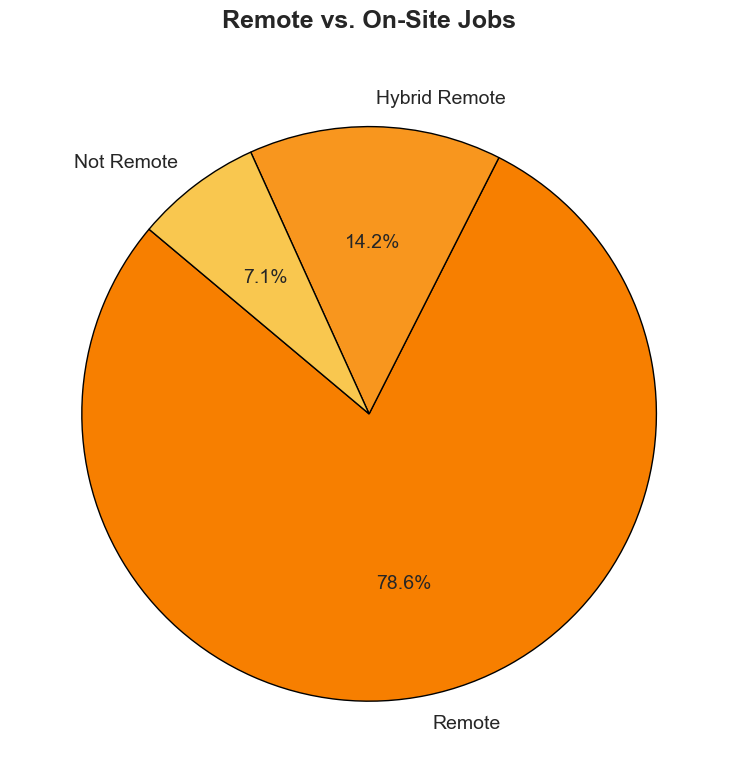

In [8]:
# Filter out "[None]" values
df_filtered = df[df["REMOTE_TYPE_NAME"] != "[None]"]

# Count the number of each remote job type
remote_counts = df_filtered["REMOTE_TYPE_NAME"].value_counts()

# Set figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Define custom colors
colors = ["#f77f00", "#f8961e", "#f9c74f"]

# Create Pie Chart (Fixed Syntax)
wedges, texts, autotexts = ax.pie(
    remote_counts,
    labels=remote_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={"fontsize": 14},
    wedgeprops={"edgecolor": "black"}
)

# Set Title
ax.set_title("Remote vs. On-Site Jobs", fontsize=18, fontweight="bold", pad=20)

# Improve layout
plt.tight_layout()

# Show the plot
plt.savefig("_output/data_analysis_4_remote_vs_onsite_piechart.png")
plt.show()
